# Evolutionary Ensemble Learning (EEL) for
## Binary Neural Networks (BNN)

In [1]:
# for local testing
import sys
sys.path.append('../autopandas')
%load_ext autoreload
%autoreload 2

In [2]:
from eel import EEL
import autopandas as apd
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier

In [3]:
data = apd.read_csv('../autopandas/autopandas/data/mushrooms.csv')
data.set_class('class')

# to have labels beginning by 0 and avoid missing data
data = data.process()

In [ ]:
# MNIST?
#from sklearn.datasets import fetch_openml
# Load data from https://www.openml.org/d/554
#X, y = fetch_openml('mnist_784', version=1, return_X_y=True)
#X = X / 255.
#data = apd.from_X_y(X, y)

In [4]:
# data
X_train = np.array(data('X_train'))
y_train = np.array(data('y_train'))
X_test = np.array(data('X_test'))
y_test = np.array(data('y_test'))

In [ ]:
# MNIST?
#y_train = y_train.astype(np.int).T[0]
#y_test = y_test.astype(np.int).T[0]

In [5]:
# model
layers = [data.input_size(), 10, data.output_size()]
model = EEL(layers=layers, n_estimators=7, l=14)

In [6]:
data.shape

(8124, 23)

In [7]:
# training
model.fit(X_train, y_train, epochs=300, p=0.0001, constant_p=False, batch_size=300,
          multi_batch=False, keep=False, force_diversity=False, verbose=False)

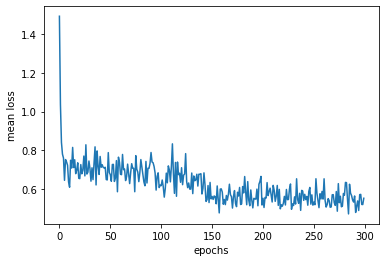

In [8]:
model.show_learning_curve()

In [9]:
print('EEL-BNN training score')
y_pred = model.predict(X_train, soft=False)
accuracy_score(y_train, y_pred)

EEL-BNN training score


0.7434499736240548

In [10]:
print('EEL-BNN score')
y_pred = model.predict(X_test, soft=False)
accuracy_score(y_test, y_pred)

EEL-BNN score


0.7562576938859253

In [11]:
# MLP with the same architecture for comparison

clf = MLPClassifier(hidden_layer_sizes=(10,))
clf.fit(X_train, y_train)
print('MLP score')
clf.score(X_test, y_test)

/usr/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLP score


1.0

In [12]:
# baseline for comparison
print('Baseline score (Random Forest)')
data.score()

Baseline score (Random Forest)


1.0